In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning

In [2]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

11493376/11490434 [==============================] - 4s 0us/step


Text(0.5, 1.0, '0')

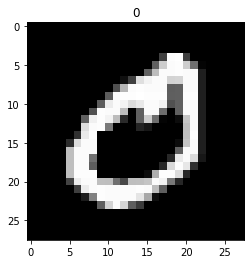

In [3]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [4]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [7]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [9]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [10]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7573 - accuracy: 0.7498 - val_loss: 0.1707 - val_accuracy: 0.9484
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2410 - accuracy: 0.9277 - val_loss: 0.1370 - val_accuracy: 0.9605
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1964 - accuracy: 0.9431 - val_loss: 0.1191 - val_accuracy: 0.9658
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1695 - accuracy: 0.9500 - val_loss: 0.1103 - val_accuracy: 0.9679
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1518 - accuracy: 0.9556 - val_loss: 0.1014 - val_accuracy: 0.9697
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1396 - accuracy: 0.9587 - val_loss: 0.1008 - val_accuracy: 0.9691
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1313 - accuracy: 0.9614 - val_loss: 0.0979 - val_accuracy:

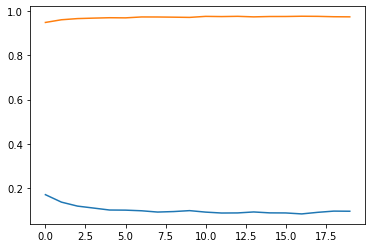

In [11]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [12]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

array([[8.4502396e-12, 1.0840746e-07, 3.6285246e-07, ..., 9.9998653e-01,
        3.3833231e-08, 7.6633123e-06],
       [1.4854494e-11, 2.5178744e-05, 9.9981266e-01, ..., 3.0571421e-08,
        6.4978579e-08, 2.4763555e-14],
       [1.0328068e-11, 9.9996769e-01, 1.0578399e-07, ..., 3.9600623e-06,
        2.4365578e-05, 3.2602505e-09],
       ...,
       [1.9150126e-12, 3.2084255e-12, 1.9352854e-08, ..., 1.6621396e-08,
        8.1511306e-13, 3.5355498e-07],
       [1.0422867e-13, 2.8280664e-10, 4.9668179e-11, ..., 6.5228750e-10,
        3.5964145e-08, 3.7243356e-10],
       [7.8771217e-12, 1.9570957e-14, 2.2720621e-12, ..., 9.4806710e-17,
        7.7802480e-11, 1.5189138e-15]], dtype=float32)

In [13]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 970,    1,    1,    2,    0,    0,    3,    2,    1,    0],
       [   0, 1125,    5,    1,    0,    1,    1,    1,    1,    0],
       [   2,    0, 1014,    3,    1,    0,    0,    8,    4,    0],
       [   0,    0,    9,  984,    0,    4,    0,    8,    2,    3],
       [   1,    0,    6,    0,  957,    0,    3,    3,    1,   11],
       [   3,    0,    0,   20,    2,  856,    4,    3,    3,    1],
       [   7,    3,    0,    1,    4,    6,  934,    0,    3,    0],
       [   2,    2,   11,    3,    0,    0,    0, 1005,    2,    3],
       [   7,    1,   10,    7,    4,    6,    0,    4,  931,    4],
       [   2,    4,    0,    6,   21,    1,    0,   11,    3,  961]],
      dtype=int64)

In [14]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]